<a href="https://colab.research.google.com/github/we1li/Datasets/blob/main/LabWork6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 6. Построение пайплайна одномерной регрессии

Выполнила: Мурашко Анастасия. ИВТ-б-о-22-1

## Подключение библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
!wget https://raw.githubusercontent.com/we1li/Datasets/main/Age_Salary.csv

--2024-04-16 21:15:08--  https://raw.githubusercontent.com/we1li/Datasets/main/Age_Salary.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 722 [text/plain]
Saving to: ‘Age_Salary.csv’

Age_Salary.csv      100%[===================>]     722  --.-KB/s    in 0s      

2024-04-16 21:15:09 (22.6 MB/s) - ‘Age_Salary.csv’ saved [722/722]



## Загрузка данных и разделение на матрицу признаков и зависимую переменную

In [4]:
dataset = pd.read_csv('Age_Salary.csv')
dataset.head()

,Age,Salary
0,37,12645
1,48,88390
2,25,74291
3,59,58123
4,32,42967


In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print ("Матрица признаков"); print(X[:5])
print ("Зависимая переменная"); print(y[:5])

Матрица признаков
[[37]
 [48]
 [25]
 [59]
 [32]]
Зависимая переменная
[12645 88390 74291 58123 42967]


## Разделение выборки на тестовую и тренировочную

In [10]:
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0)

## Обучение линейной модели регрессии

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Предсказание, обработка и визуализация результатов

In [12]:
y_pred = regressor.predict(X_test)
print(y_pred)

[58949.48172359 59143.17785201 58986.37622424 59189.29597782
 59078.61247587 59198.51960299 59235.41410364 59170.8487275
 59050.94160038 59097.05972619 59253.86135397 59106.28335136
 59014.04709973 59253.86135397 59152.40147717 59226.19047848
 59327.65035527 59216.96685331 59023.27072489 59133.95422685]


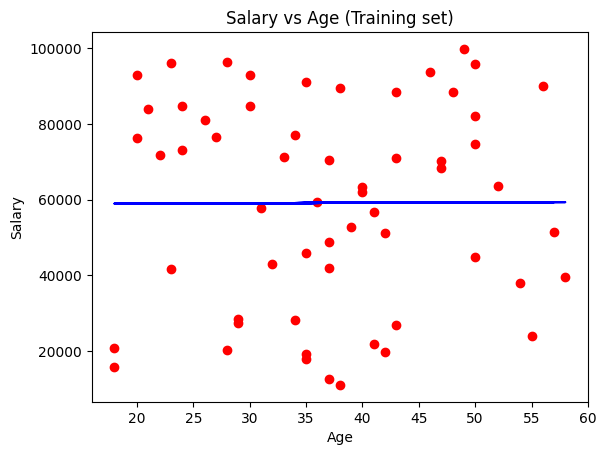

In [14]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Age (Training set)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

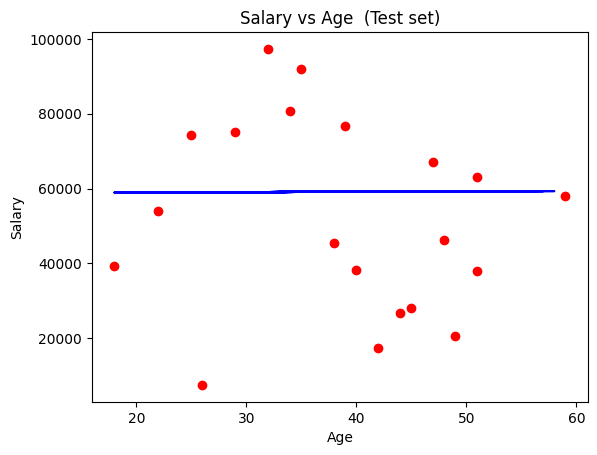

In [15]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Age  (Test set)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()